In [1]:
import matplotlib.pyplot as plt
import seaborn as sns # 데이터셋 가져오는 용도

# 그래프 스타일
plt.style.use('default')
sns.set_palette('husl')

# 한글이 깨짐 -> 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 기호 깨짐 -> 설정
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 기본 그래프 만들기
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


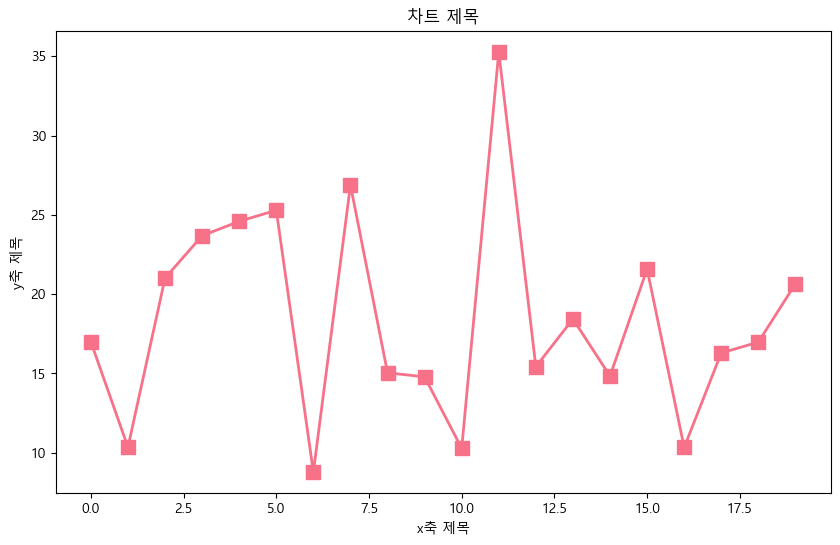

In [3]:
# 꺽은 선 그래프
plt.figure(figsize=(10,6))
plt.plot(tips['total_bill'][:20],marker='s' , linewidth=2, markersize=10) # 그래프에 사용 할 데이터
plt.title('차트 제목')
plt.xlabel('x축 제목')
plt.ylabel('y축 제목')

plt.show() # 그래프 보기

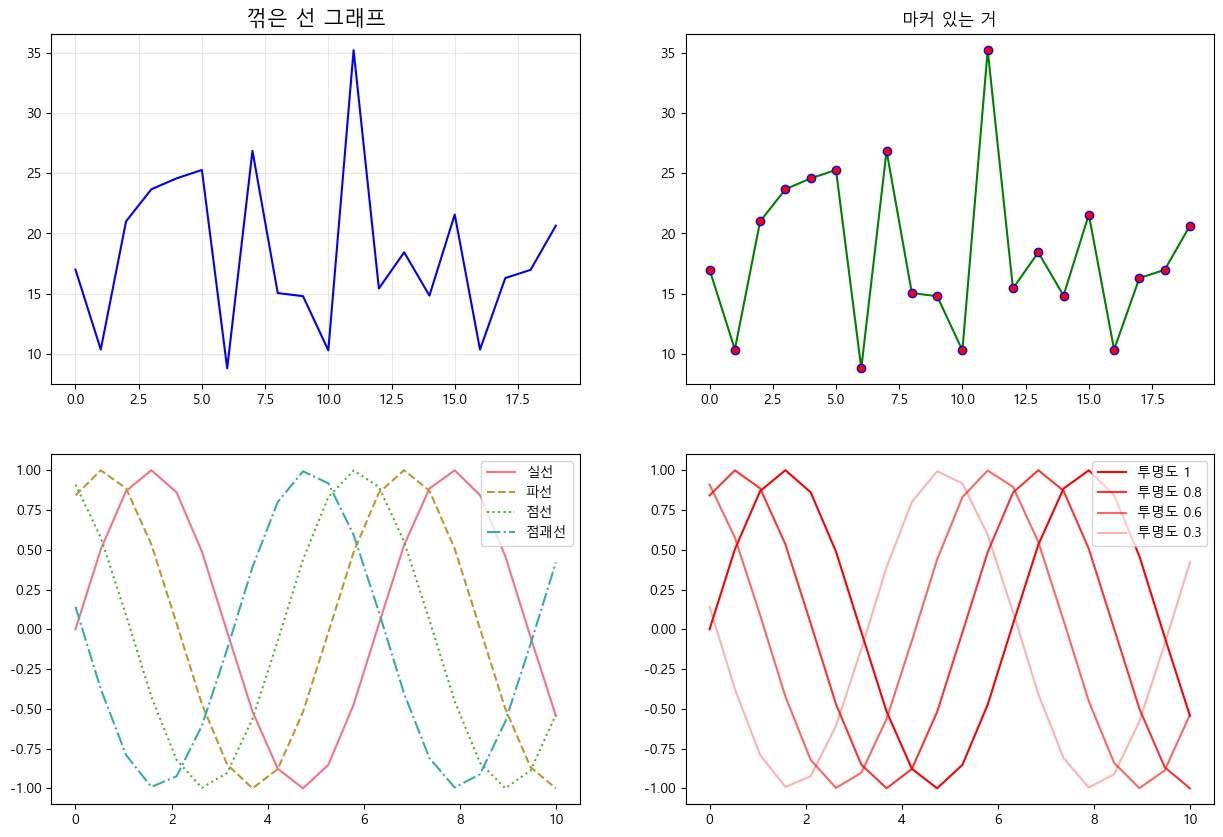

In [4]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
# fig는 그림 ,ax는 좌표

# 기본
ax[0, 0].plot(tips['total_bill'][:20], color='blue')
ax[0,0].set_title('꺾은 선 그래프', fontsize=15)
ax[0,0].grid(True, alpha=0.3) # 격자 생성 , 알파는 투명도

# 마커가 있는 그래프 (s, o, ^, x, +, * 등 여러가지 있음)
ax[0,1].plot(tips['total_bill'][:20], marker='o', color='green', 
             markerfacecolor='red', markeredgecolor='blue')
ax[0,1].set_title('마커 있는 거')

import numpy as np
# 선 종류도 다르게 가능함 ('-', '--', ':', '-.')
x = np.linspace(0, 10, 20) # 차트로 사용 할 데이터
ax[1,0].plot(x, np.sin(x), linestyle='-', label='실선')
ax[1,0].plot(x, np.sin(x+1), linestyle='--', label='파선')
ax[1,0].plot(x, np.sin(x+2), linestyle=':', label='점선')
ax[1,0].plot(x, np.sin(x+3), linestyle='-.', label='점괘선')
ax[1,0].legend() # 범례 표시

# 선 투명도
ax[1,1].plot(x, np.sin(x), alpha=1, color='red', label='투명도 1') # 알파는 투명도
ax[1,1].plot(x, np.sin(x+1), alpha=0.8, color='red', label='투명도 0.8')
ax[1,1].plot(x, np.sin(x+2), alpha=0.6, color='red', label='투명도 0.6')
ax[1,1].plot(x, np.sin(x+3), alpha=0.3, color='red', label='투명도 0.3')
ax[1,1].legend()

plt.show()

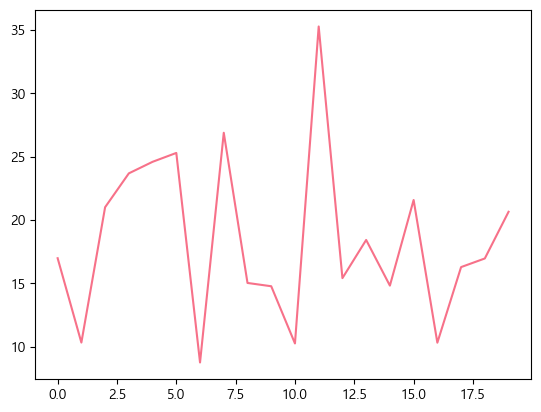

In [5]:
fig, ax = plt.subplots()
ax.plot(tips['total_bill'][:20])

plt.show()

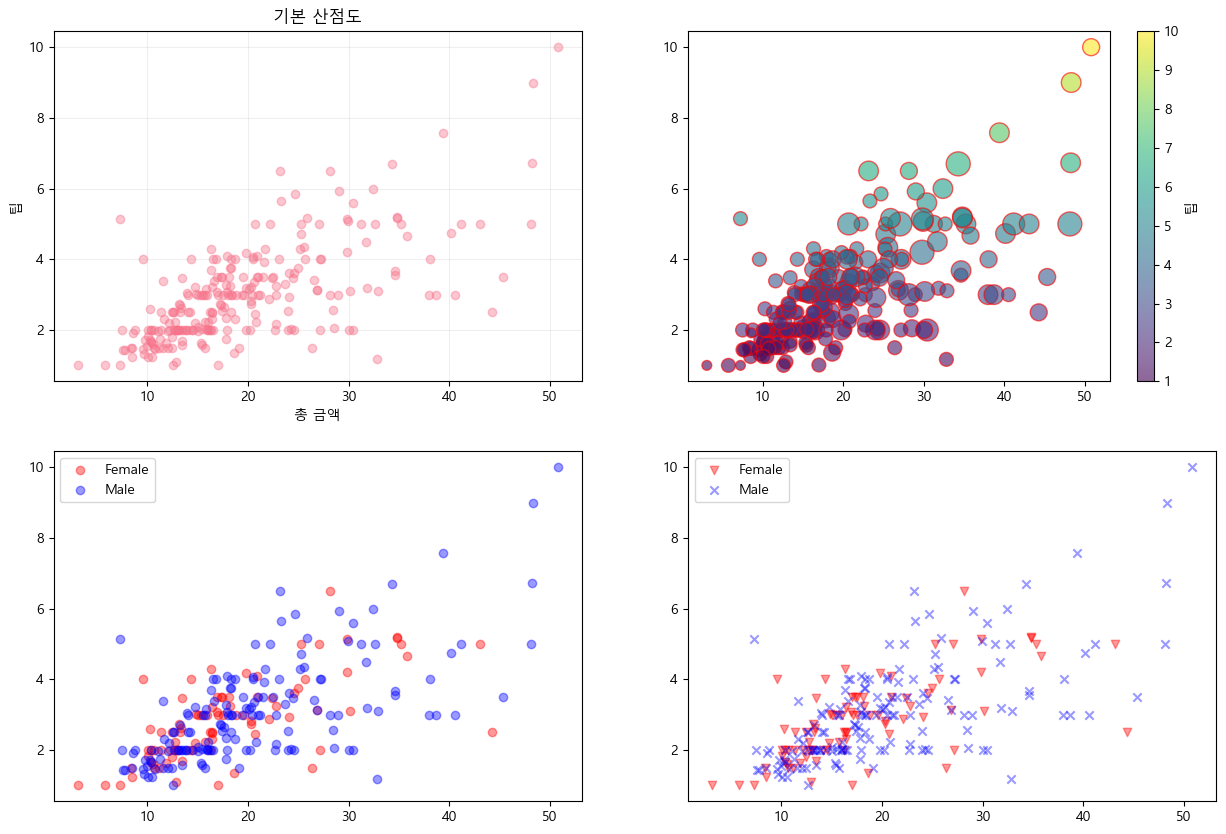

In [6]:
# 산점도(분포)
fig, ax = plt.subplots(2, 2, figsize=(15,10))

# 기본 산점도
ax[0, 0].scatter(tips['total_bill'],tips['tip'],
                 alpha=0.4) # (데이터[값]x,데이터[값]y) 이렇게 들어감
ax[0, 0].set_title('기본 산점도')
ax[0, 0].set_xlabel('총 금액')
ax[0, 0].set_ylabel('팁')
ax[0, 0].grid(True, alpha=0.2)

# 크기, 색
scatter = ax[0, 1].scatter(tips['total_bill'],tips['tip'],
                 s=tips['size'] *50, # 테이블 당 인원수 *50 만큼 크기가 지정
                 c=tips['tip'], # 색 tip에 넣어줄거야
                 cmap='viridis', # 컬러맵(사이트가서 보고 정함)
                 alpha=0.6,
                 edgecolors='red', # 테두리 색 
                 linewidths=1 # 테두리 두께
                 )

plt.colorbar(scatter, ax=ax[0,1], label='팁')

# 성별 별 총액과 팁
colors = {'Male':'blue', 'Female':'red'}

for s in tips['sex'].unique():
  data = tips[tips['sex'] == s]
  ax[1, 0].scatter(data['total_bill'],data['tip'],
                   c=colors[s], label=s, alpha=0.4)
ax[1,0].legend()

# 마커 변경
markers = {'Male':'x', 'Female':'v'}

for s in tips['sex'].unique():
  data = tips[tips['sex'] == s]
  ax[1, 1].scatter(data['total_bill'],data['tip'],
                   c=colors[s], label=s, alpha=0.4,marker=markers[s])
ax[1,1].legend()

plt.show()


C:\Users\M\AppData\Local\Temp\ipykernel_3624\1936200961.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_total = tips.groupby('day')['total_bill'].sum()
C:\Users\M\AppData\Local\Temp\ipykernel_3624\1936200961.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_total = tips.groupby('day')['total_bill'].sum()
C:\Users\M\AppData\Local\Temp\ipykernel_3624\1936200961.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warni

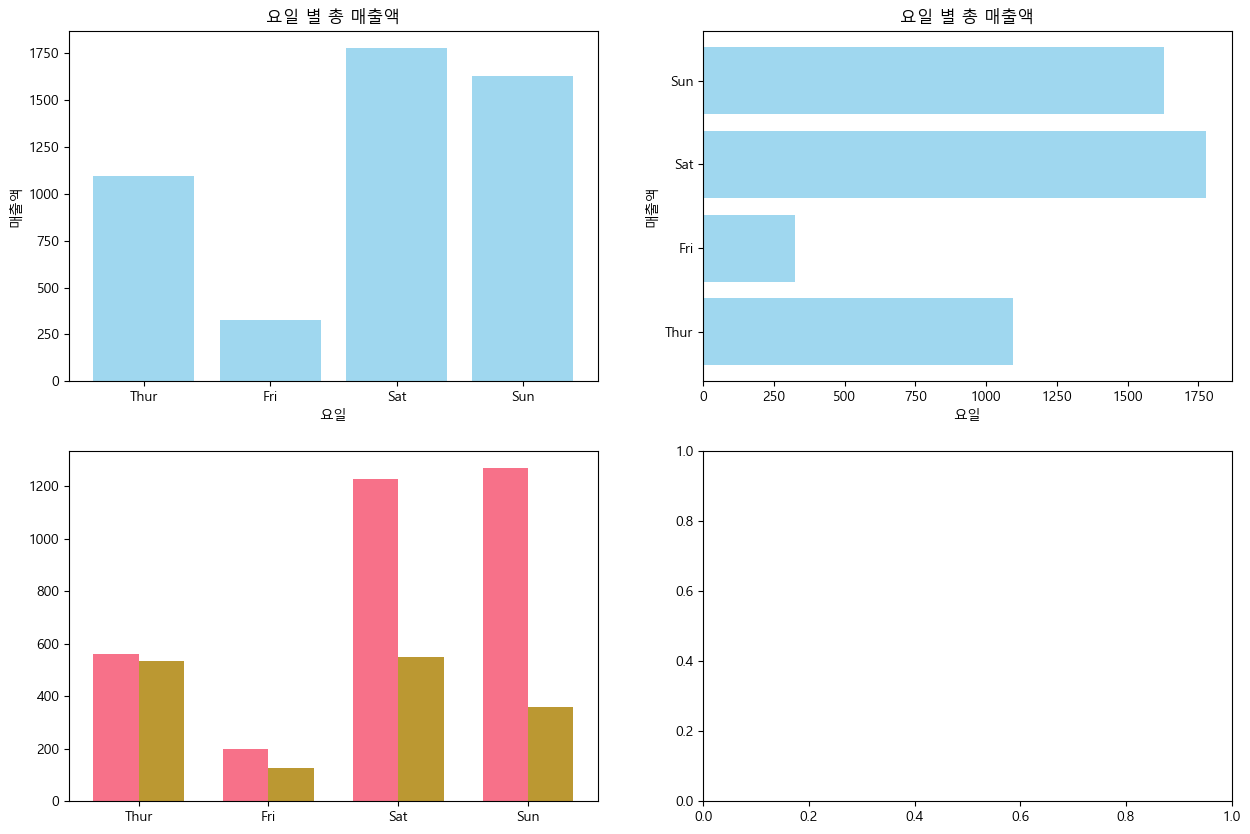

In [7]:
# 막대 그래프
fig, ax = plt.subplots(2, 2, figsize=(15,10))

# 요일 별 총 매출액
day_total = tips.groupby('day')['total_bill'].sum()
ax[0,0].bar(day_total.index, day_total.values, color='skyblue', alpha=0.8)
ax[0,0].set_title('요일 별 총 매출액')
ax[0,0].set_xlabel('요일')
ax[0,0].set_ylabel('매출액')

# 수평 막대 그래프
day_total = tips.groupby('day')['total_bill'].sum()
ax[0,1].barh(day_total.index, day_total.values, color='skyblue', alpha=0.8)
ax[0,1].set_title('요일 별 총 매출액')
ax[0,1].set_xlabel('요일')
ax[0,1].set_ylabel('매출액')

# 성별 별 요일 별 매출액 합계
data = tips.groupby(['sex','day'])['total_bill'].sum().unstack()
x = np.arange(len(data.columns))
width = 0.35

ax[1,0].bar(x - width / 2, data.loc['Male'], width)
ax[1,0].bar(x + width / 2, data.loc['Female'], width)

ax[1,0].set_xticks(x)
ax[1,0].set_xticklabels(data.columns)

plt.show()

In [8]:
data = tips.groupby(['sex','day'])['total_bill'].sum().unstack()
data.loc['Male']

C:\Users\M\AppData\Local\Temp\ipykernel_3624\830689350.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data = tips.groupby(['sex','day'])['total_bill'].sum().unstack()


day
Thur     561.44
Fri      198.57
Sat     1227.35
Sun     1269.46
Name: Male, dtype: float64

In [9]:
tips.pivot_table(index='day', columns='sex', values='total_bill', aggfunc='sum')

C:\Users\M\AppData\Local\Temp\ipykernel_3624\2312124234.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tips.pivot_table(index='day', columns='sex', values='total_bill', aggfunc='sum')


sex,Male,Female
day,,
Thur,561.44,534.89
Fri,198.57,127.31
Sat,1227.35,551.05
Sun,1269.46,357.70


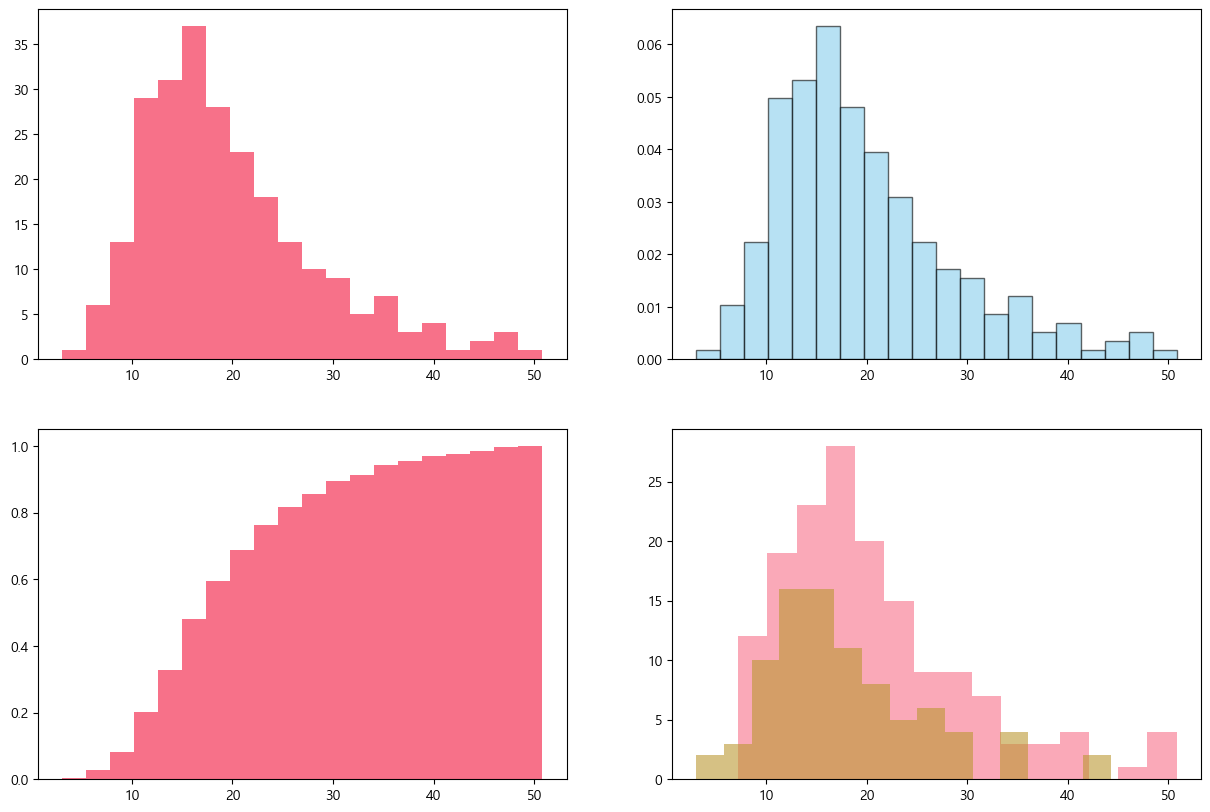

In [10]:
# 히스토그램
fig, ax = plt.subplots(2, 2, figsize=(15,10))

# 기본 ( bins : 구간 개수 )
ax[0,0].hist(tips['total_bill'], bins=20)

# 밀도 정규화
ax[0,1].hist(tips['total_bill'], bins=20, color='skyblue', edgecolor='black',
              alpha=0.6, density=True) # 밀도 정규화(y측이 확률 밀도로 표시, 막대들의 합이 1이 되도록 정규화)

# 누적 히스토그램
ax[1,0].hist(tips['total_bill'], bins=20, density=True, cumulative=True)

# 남 녀
male = tips[ tips['sex'] == 'Male']['total_bill']
female = tips[ tips['sex'] == 'Female']['total_bill']

ax[1,1].hist(male, bins=15, alpha=0.6)
ax[1,1].hist(female, bins=15, alpha=0.6)

plt.show()

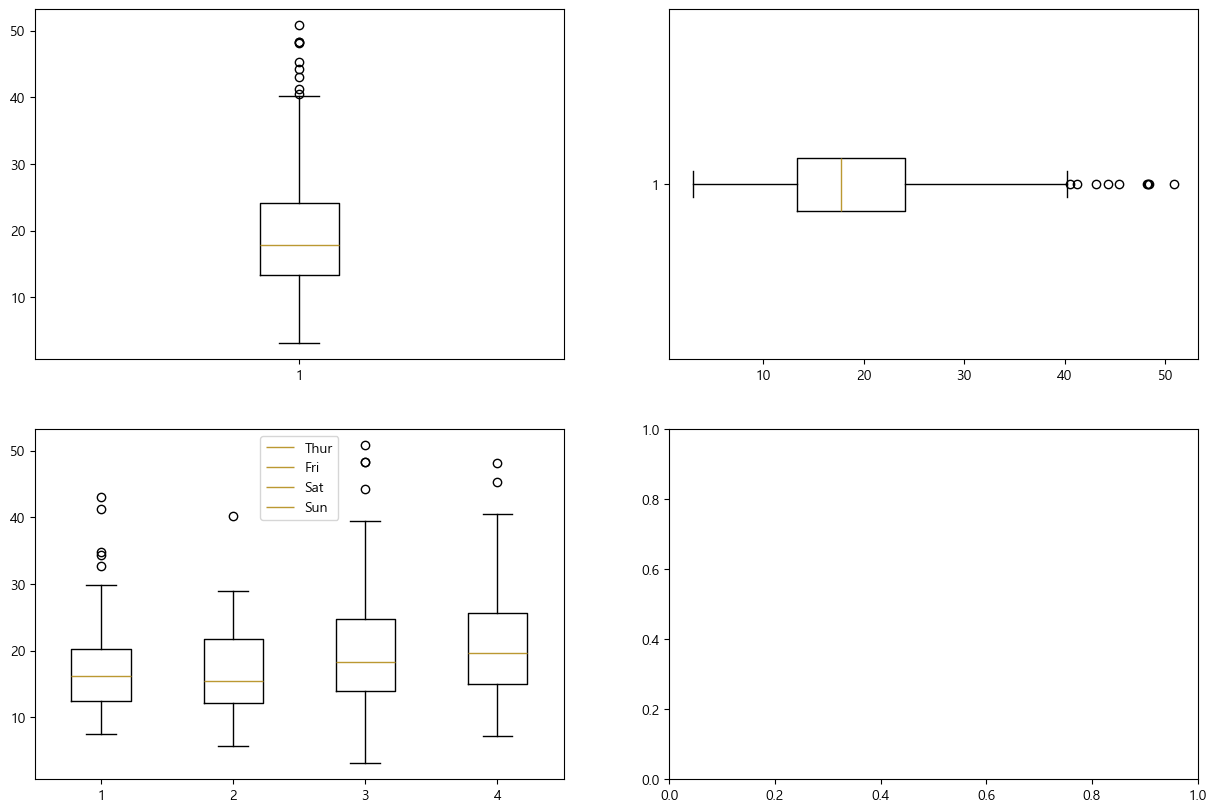

In [11]:
# 박스
fig, ax = plt.subplots(2, 2, figsize=(15,10))

# 기본
ax[0,0].boxplot(tips['total_bill'])

ax[0,1].boxplot(tips['total_bill'], vert=False)

week = ['Thur','Fri','Sat','Sun']
data = [tips.loc[tips['day'] == d, 'total_bill'] for d in week]
ax[1,0].boxplot(data,label=week)
ax[1,0].legend()

plt.show()

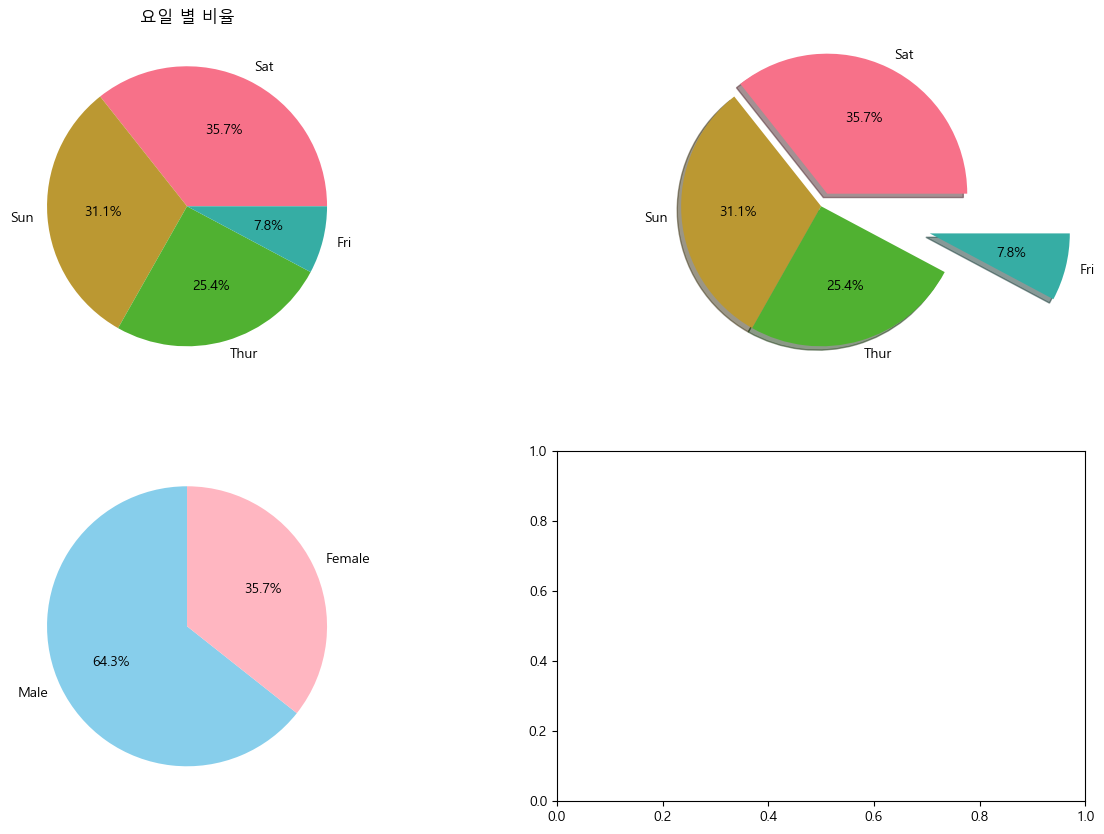

In [12]:
# 원형 차트
fig, ax = plt.subplots(2, 2, figsize=(15,10))

day_count = tips['day'].value_counts()
ax[0,0].pie(day_count.values, labels=day_count.index, autopct='%1.1f%%')
ax[0,0].set_title('요일 별 비율')

explode = (0.1, 0, 0, 0.8) # 분리 할 설정 값
ax[0,1].pie(
  day_count.values, labels=day_count.index, autopct='%1.1f%%' , explode=explode, shadow=True
)

sc = tips['sex'].value_counts()
ax[1,0].pie(sc.values, labels=sc.index, colors=['skyblue','lightpink'], 
            autopct='%1.1f%%', startangle=90)

plt.show()

C:\Users\M\AppData\Local\Temp\ipykernel_3624\421791072.py:14: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  dt = tips.pivot_table(index='day', columns='time', values='total_bill', aggfunc='sum')
C:\Users\M\AppData\Local\Temp\ipykernel_3624\421791072.py:23: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sc = tips.pivot_table(index='sex',columns='day', values='tip', aggfunc='mean')


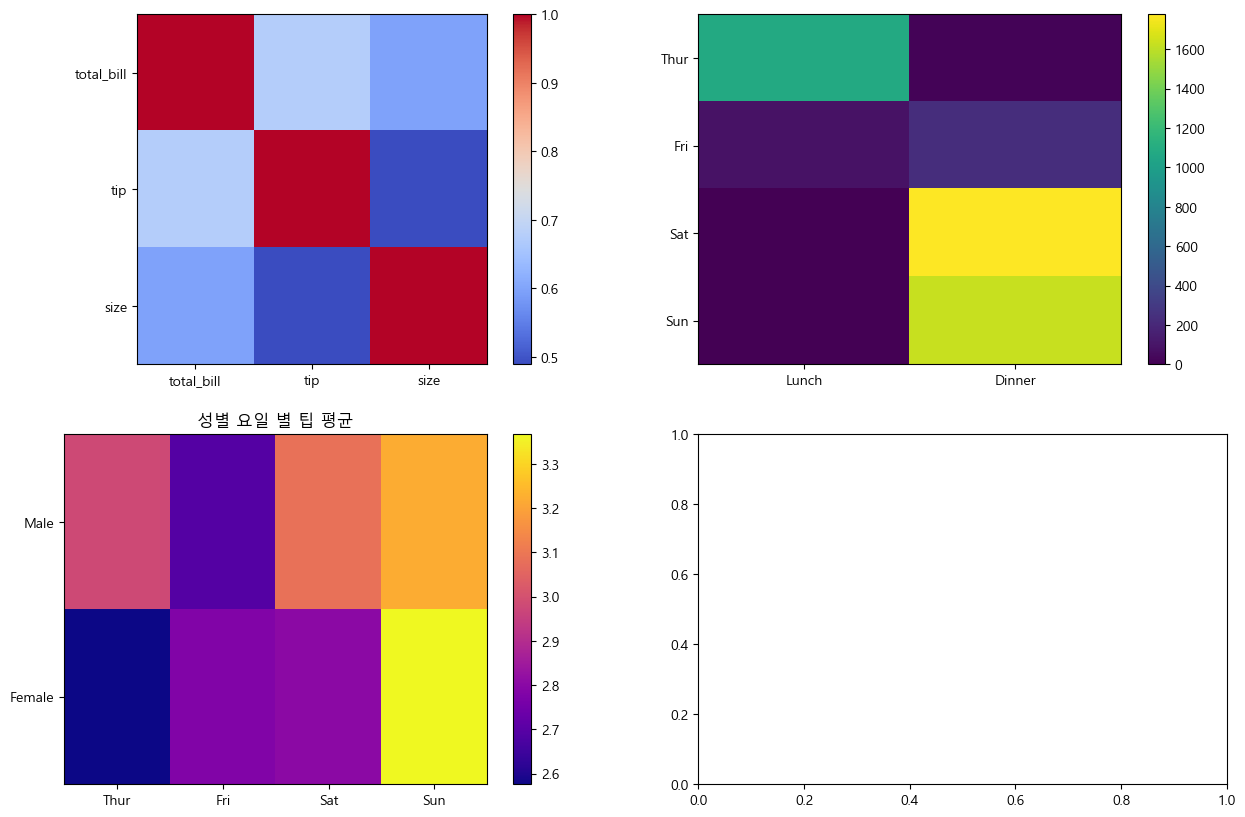

In [13]:
# 히트맵
fig, ax = plt.subplots(2, 2, figsize=(15,10))
corr_data = tips[['total_bill','tip','size']].corr()

heat1 = ax[0,0].imshow(corr_data, cmap='coolwarm')
ax[0,0].set_xticks(range(len(corr_data.columns)))
ax[0,0].set_yticks(range(len(corr_data.columns)))
ax[0,0].set_xticklabels(corr_data.columns)
ax[0,0].set_yticklabels(corr_data.columns)

plt.colorbar(heat1, ax=ax[0,0])

# 요일 별 시간대 별 매출 히트맵
dt = tips.pivot_table(index='day', columns='time', values='total_bill', aggfunc='sum')
heat2 = ax[0,1].imshow(dt.values, cmap='viridis', aspect='auto')
ax[0,1].set_xticks(range(len(dt.columns)))
ax[0,1].set_xticklabels(dt.columns)
ax[0,1].set_yticks(range(len(dt.index)))
ax[0,1].set_yticklabels(dt.index)
plt.colorbar(heat2, ax=ax[0,1])

# 성별 요일 별 평균
sc = tips.pivot_table(index='sex',columns='day', values='tip', aggfunc='mean')
heat3 = ax[1,0].imshow(sc.values, cmap='plasma', aspect='auto')
ax[1,0].set_title('성별 요일 별 팁 평균')
ax[1,0].set_xticks(range(len(sc.columns)))
ax[1,0].set_xticklabels(sc.columns)
ax[1,0].set_yticks(range(len(sc.index)))
ax[1,0].set_yticklabels(sc.index)
plt.colorbar(heat3, ax=ax[1,0])

plt.show()

C:\Users\M\AppData\Local\Temp\ipykernel_3624\1228186903.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dt = tips.groupby('day')['total_bill'].sum()


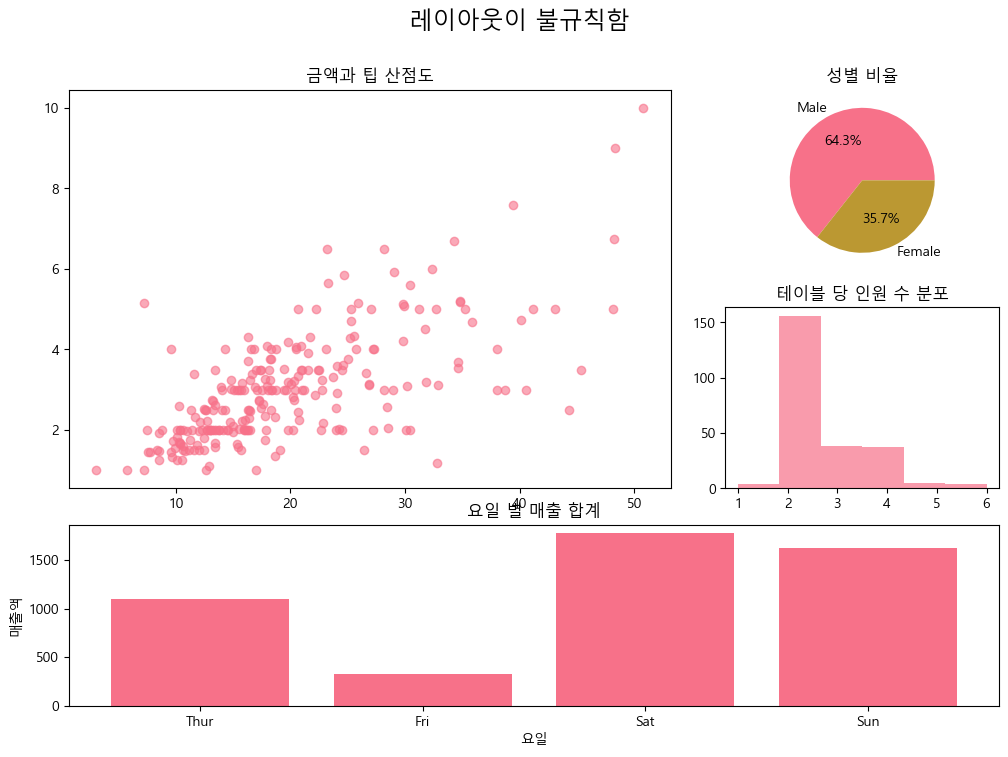

In [14]:
# 불규칙적인 레이아웃
fig = plt.figure(figsize=(12,8))
fig.suptitle('레이아웃이 불규칙함', fontsize=17)

ax1 = plt.subplot2grid((3,3),(0,0), colspan=2, rowspan=2) # span은 병합하는 거(?)
ax1.scatter(tips['total_bill'], tips['tip'], alpha=0.6)
ax1.set_title('금액과 팁 산점도')

ax2 = plt.subplot2grid((3,3),(0,2))
ax2.pie(tips['sex'].value_counts().values, labels=tips['sex'].value_counts().index,
        autopct='%1.1f%%')
ax2.set_title('성별 비율')

ax3 = plt.subplot2grid((3,3),(1,2))
ax3.hist(tips['size'], bins=6, alpha=0.7)
ax3.set_title('테이블 당 인원 수 분포')

ax4 = plt.subplot2grid((3,3),(2,0), colspan=3) # colspan이 병합임 -> 가로 병합 / row는 세로 병합
dt = tips.groupby('day')['total_bill'].sum()
ax4.bar(dt.index, dt.values)
ax4.set_title('요일 별 매출 합계')
ax4.set_xlabel('요일')
ax4.set_ylabel('매출액')


plt.savefig('test1.png', dpi=300, bbox_inches='tight') # 이미지로 변환해서 저장하는거임 (파일이 이미지로 왼쪽에 저장됨)

plt.show()